In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 


In [8]:
# check if person will exit bank or not

In [59]:
# import some basic dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# load dataset 
data=pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# as first 3 column does not help to analyse we can remove it first
# now divide dependent and independent variable into y and x resp.
x=data.iloc[:,3:-1]
y=data.iloc[:,-1].values

In [20]:
# feature engineering
""" we will remove first column of dummies value that has
been ceated above because zero value in last two column means 1 value in first """
x=pd.get_dummies(x,drop_first=True)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)



In [23]:
# feature scalling
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [25]:
x_train.shape

(8000, 11)

In [26]:
# now where tensorflow came
from tensorflow.keras.models import Sequential      # make code run one after another in sequential manner
from tensorflow.keras.layers import Dense            # used to create hidden layer or nueron
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,ELU   #this is activation function between hidden layes
from tensorflow.keras.layers import Dropout            # when nueron dies we cut of all connection with it 

In [27]:
# lets initilize ANN
classifier=Sequential()

In [33]:
# adding the input layer
classifier.add(Dense(units=11,activation='relu'))          # units= how much input nueron will need 
# and activation=what will be the next layers activatin function

In [36]:
# adding hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [37]:
# adding hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [39]:
# adding output layer
classifier.add(Dense(1,activation='sigmoid'))         # as we need to find exit value witch is binary 
# hense single unit and sigmoid fuction 

In [48]:
import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)     #we use adam optimizer as it is best and loss as it is binary below

In [49]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])       

In [67]:
# early stopping of epoch to understad accuracy
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [68]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8701 - val_loss: 0.3810 - val_accuracy: 0.8372
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8677 - val_loss: 0.3718 - val_accuracy: 0.8482
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8649 - val_loss: 0.3731 - val_accuracy: 0.8523
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3218 - accuracy: 0.8690 - val_loss: 0.3663 - val_accuracy: 0.8489
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3255 - accuracy: 0.8664 - val_loss: 0.3772 - val_accuracy: 0.8531
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8640 - val_loss: 0.3643 - val_accuracy: 0.8493
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8698 - val_loss: 0.3698 - val_accuracy:

In [69]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

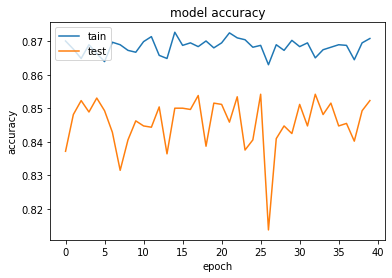

In [70]:
# summerize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['tain','test'],loc='upper left')
plt.show()


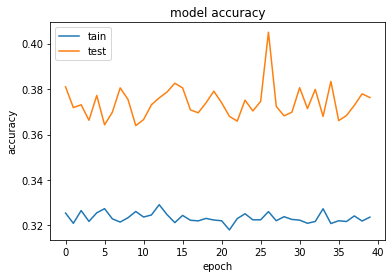

In [71]:
# summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['tain','test'],loc='upper left')
plt.show()


In [72]:
# making the prediction 
ypred=classifier.predict(x_test)
ypred=(ypred>=0.5)

In [77]:
# make cconfusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
cm

array([[1530,   65],
       [ 213,  192]])

In [79]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ypred,y_test)
score

0.861